# Study the Impact of Electric Vehicles on Indian Economy

### **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Data Gathering & Preprossing**

In [2]:
# List of Years and Months for which we are collecting data
years = [2016,2017,2018,2019,2020,2021]
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Path where raw data is present
dataset_path = '../Data sets/VehicleDataSet'

# Creating DataFrame contains all fuel-type vehicles sales data monthwise from JAN 2016 to OCT 2021
vehicle_dataset = pd.DataFrame(columns=['Vehicle Class','CNG ONLY','DIESEL','DIESEL/HYBRID','DUAL DIESEL/BIO CNG','DUAL DIESEL/CNG','DUAL DIESEL/LNG','ELECTRIC','ETHANOL','LNG','LPG ONLY','METHANOL','NOT APPLICABLE','PETROL','PETROL/CNG','PETROL/ETHANOL','PETROL/HYBRID','PETROL/LPG','PETROL/METHANOL','SOLAR','TOTAL'])
t = 0
for year in years:
  for month in months:

    if year == 2021 and month == 'NOV':
      break

    month_ev = pd.read_excel(dataset_path + '/' + month + str(year) + 'Vehicle.xlsx')
    month_ev = month_ev[3:]
    month_ev.columns = ['S No','Vehicle Class','CNG ONLY','DIESEL','DIESEL/HYBRID','DUAL DIESEL/BIO CNG','DUAL DIESEL/CNG','DUAL DIESEL/LNG','ELECTRIC','ETHANOL','LNG','LPG ONLY','METHANOL','NOT APPLICABLE','PETROL','PETROL/CNG','PETROL/ETHANOL','PETROL/HYBRID','PETROL/LPG','PETROL/METHANOL','SOLAR','TOTAL']
    
    month_ev.drop('S No', axis='columns', inplace=True)
    
    cols = ['CNG ONLY','DIESEL','DIESEL/HYBRID','DUAL DIESEL/BIO CNG','DUAL DIESEL/CNG','DUAL DIESEL/LNG','ELECTRIC','ETHANOL','LNG','LPG ONLY','METHANOL','NOT APPLICABLE','PETROL','PETROL/CNG','PETROL/ETHANOL','PETROL/HYBRID','PETROL/LPG','PETROL/METHANOL','SOLAR','TOTAL']
    for col in cols:
      month_ev[col] = month_ev[col].str.replace(',','')
    
    month_ev['Year'] = year
    month_ev['Month'] = month
    t += 1
    month_ev['timeinterval'] = t

    month_ev = month_ev.astype({'CNG ONLY':int, 'DIESEL':int, 'DIESEL/HYBRID':int, 'DUAL DIESEL/BIO CNG':int, 'DUAL DIESEL/CNG':int, 'DUAL DIESEL/LNG':int, 'ELECTRIC':int, 'ETHANOL':int, 'LNG':int, 'LPG ONLY':int, 'METHANOL':int, 'NOT APPLICABLE':int, 'PETROL':int, 'PETROL/CNG':int, 'PETROL/ETHANOL':int, 'PETROL/HYBRID':int, 'PETROL/LPG':int, 'PETROL/METHANOL':int, 'SOLAR':int, 'timeinterval':int, 'TOTAL':int})

    vehicle_dataset = vehicle_dataset.append(month_ev)

vehicle_dataset.reset_index(drop=True, inplace=True)
vehicle_dataset.head()

C:\Users\hp\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\1320844844.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vehicle_dataset = vehicle_dataset.append(month_ev)
C:\Users\hp\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\1320844844.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vehicle_dataset = vehicle_dataset.append(month_ev)
C:\Users\hp\anaconda3\lib\site-packages\openpyxl\styles\st

,Vehicle Class,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC,ETHANOL,LNG,...,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,TOTAL,Year,Month,timeinterval
0,ADAPTED VEHICLE,0,11,0,0,0,0,1,0,0,...,11,0,0,0,0,0,615,2016.0,JAN,1.0
1,AGRICULTURAL TRACTOR,0,28284,0,0,0,0,1,0,0,...,0,0,0,0,0,0,28520,2016.0,JAN,1.0
2,AMBULANCE,1,463,0,0,0,0,0,0,0,...,9,0,0,6,0,0,759,2016.0,JAN,1.0
3,ANIMAL AMBULANCE,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2016.0,JAN,1.0
4,ARTICULATED VEHICLE,1,1774,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1776,2016.0,JAN,1.0


In [3]:
# Creating DataFrame contains Diesel, Petrol and Electric fuel-type vehicles count data year wise from 2016
DPEV_year_dataset = vehicle_dataset[['Year','DIESEL','PETROL','ELECTRIC']]
DPEV_year_dataset = DPEV_year_dataset.groupby(by='Year').sum()
DPEV_year_dataset = DPEV_year_dataset.reset_index()
DPEV_year_dataset

,Year,DIESEL,PETROL,ELECTRIC
0,2016.0,2437461,16186736,51260
1,2017.0,2530697,17697397,88346
2,2018.0,2785655,19084216,132099
3,2019.0,2535852,18077203,161313
4,2020.0,1754657,14059252,119656
5,2021.0,1459985,11240635,218317


In [4]:
# Creating DataFrame contains Diesel, Petrol and Electric fuel-type vehicles count data of past 70 months (from JAN 2016 to OCT 2021)
DPEV_month_dataset = vehicle_dataset[['timeinterval','DIESEL','PETROL','ELECTRIC','TOTAL']]
DPEV_month_dataset = DPEV_month_dataset.groupby(by='timeinterval').sum()
DPEV_month_dataset = DPEV_month_dataset.reset_index()
DPEV_month_dataset['Log ELECTRIC'] = np.log(DPEV_month_dataset['ELECTRIC'])
DPEV_month_dataset['Log TOTAL'] = np.log(DPEV_month_dataset['TOTAL'])
DPEV_month_dataset.head()

,timeinterval,DIESEL,PETROL,ELECTRIC,TOTAL,Log ELECTRIC,Log TOTAL
0,1.0,221831,1305912,2137,1574943,7.667158,14.269730
1,2.0,215196,1324057,2711,1584517,7.905073,14.275790
2,3.0,220363,1315082,4689,1586732,8.452975,14.277187
3,4.0,192510,1330967,3219,1572046,8.076826,14.267889
4,5.0,208805,1398426,4146,1658115,8.329899,14.321192


### **Data Visualization**

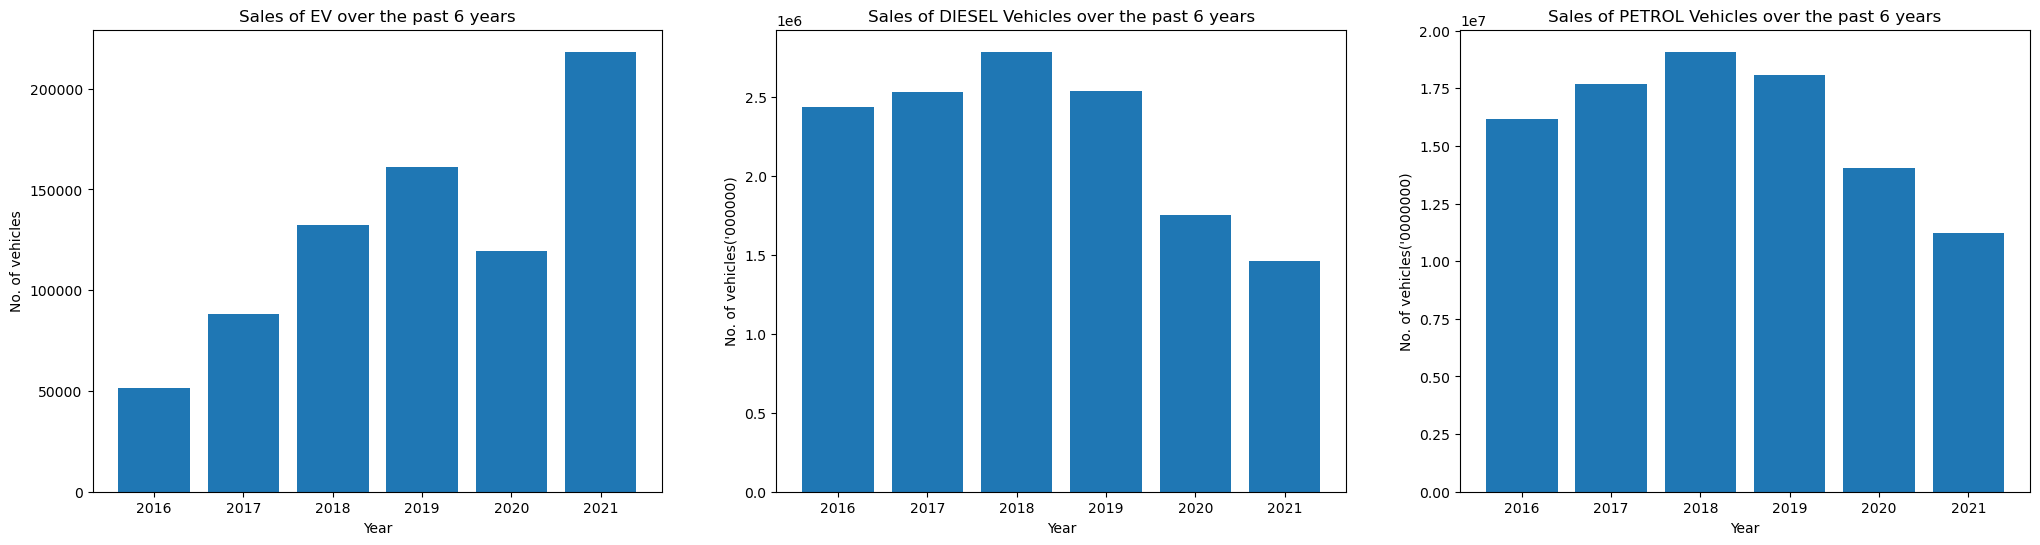

In [5]:
# Plotting Graphs for Sales of DIESEL, PETROL and ELECTRIC Vehicle over the past 6 years

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(25,6))

axis1.bar(x=DPEV_year_dataset['Year'],height=DPEV_year_dataset['ELECTRIC'])
axis1.set_xlabel('Year')
axis1.set_ylabel('No. of vehicles')
axis1.set_title('Sales of EV over the past 6 years')

axis2.bar(x=DPEV_year_dataset['Year'],height=DPEV_year_dataset['DIESEL'])
axis2.set_xlabel('Year')
axis2.set_ylabel('No. of vehicles(\'000000)')
axis2.set_title('Sales of DIESEL Vehicles over the past 6 years')

axis3.bar(x=DPEV_year_dataset['Year'],height=DPEV_year_dataset['PETROL'])
axis3.set_xlabel('Year')
axis3.set_ylabel('No. of vehicles(\'0000000)')
axis3.set_title('Sales of PETROL Vehicles over the past 6 years')

plt.savefig('output/Sales of PETROL Vehicles over the past 6 years.jpg')

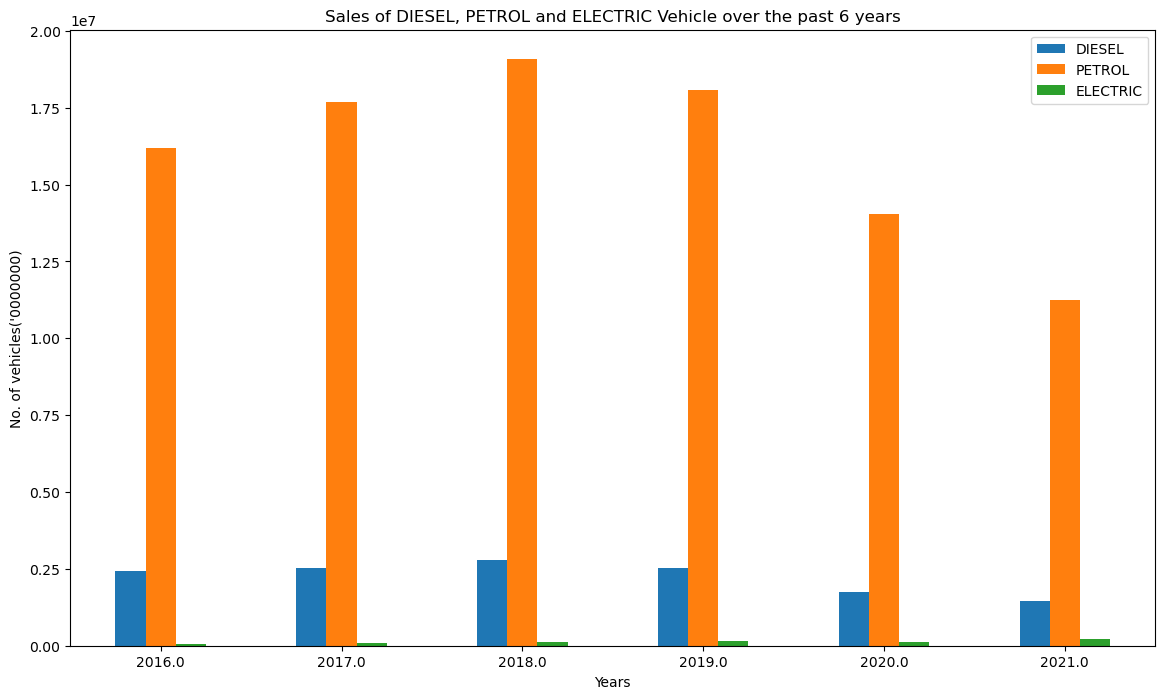

In [6]:
# Plotting Comparision graph of Sales of DIESEL, PETROL and ELECTRIC Vehicle over the past 6 years
DPEV_year_dataset.plot.bar(x='Year',y=['DIESEL','PETROL','ELECTRIC'],rot=0,title='Sales of DIESEL, PETROL and ELECTRIC Vehicle over the past 6 years',figsize=(14,8))
plt.xlabel('Years')
plt.ylabel('No. of vehicles(\'0000000)')
plt.savefig('output/Sales of DIESEL, PETROL and ELECTRIC Vehicle over the past 6 years.jpg')
plt.show()

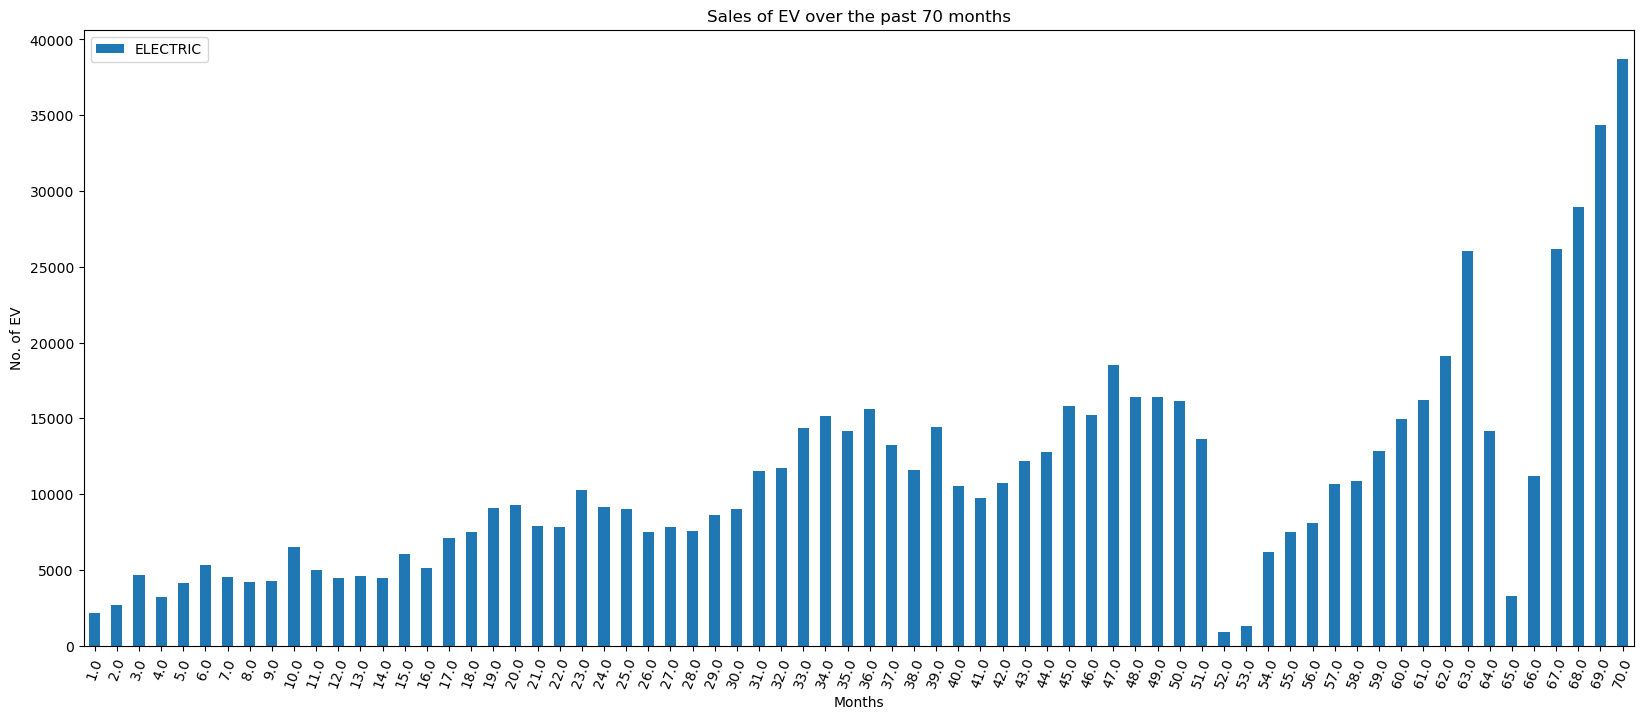

In [7]:
# Plotting Graph for ELECTRIC Vehicle over the past 70 months
DPEV_month_dataset.plot.bar(x='timeinterval',y='ELECTRIC',rot=70,title='Sales of EV over the past 70 months',figsize=(20,8))
plt.xlabel('Months')
plt.ylabel('No. of EV')
plt.savefig('output/Sales of EV over the past 70 months.jpg')
plt.show()

Log of EV Graph

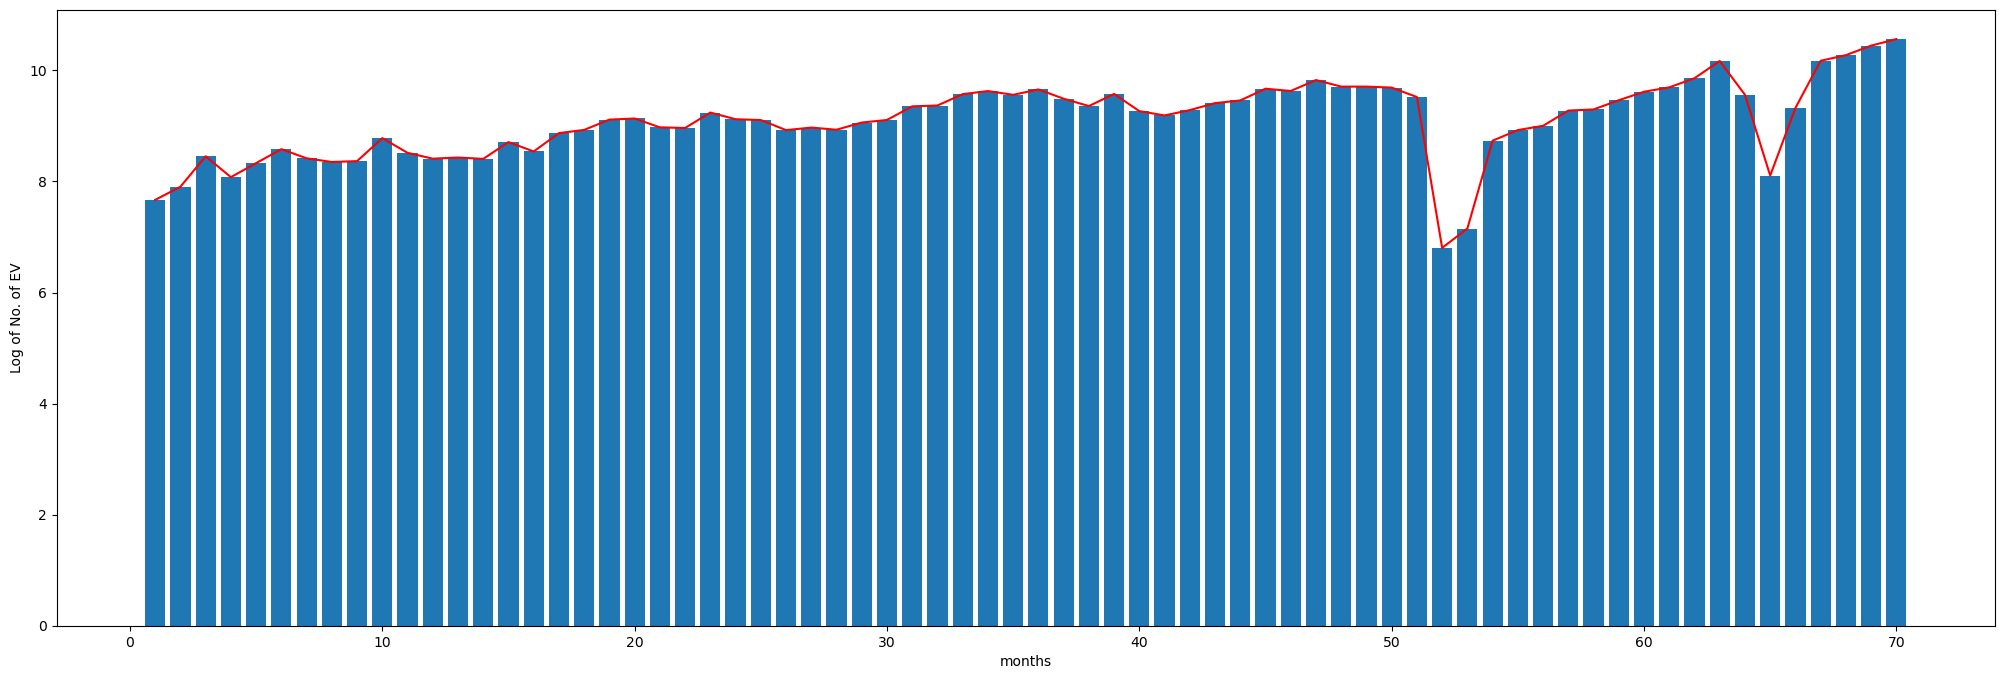

In [8]:
# Plotting Graph for log of ELECTRIC Vehicle over the past 70 months
plt.figure(figsize=(25,8))
plt.bar(x=DPEV_month_dataset['timeinterval'], height=np.log(DPEV_month_dataset['ELECTRIC']))
plt.plot(DPEV_month_dataset['timeinterval'],np.log(DPEV_month_dataset['ELECTRIC']),'r')
plt.xlabel('months')
plt.ylabel('Log of No. of EV')
plt.savefig('output/Sales of log of EV over the past 70 months.jpg')
plt.show()

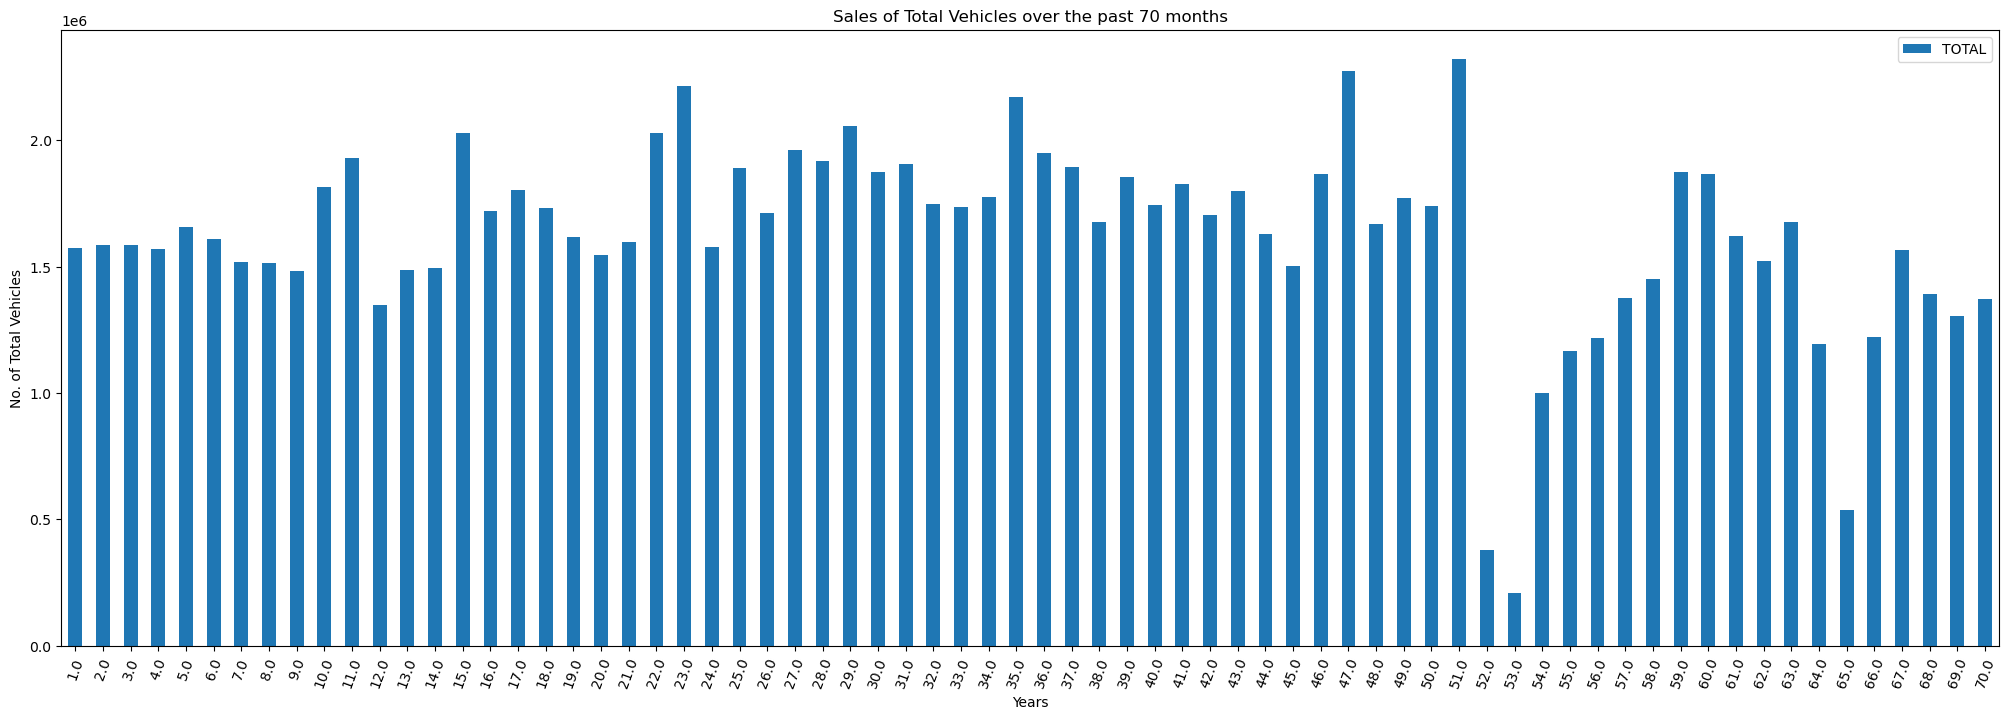

In [9]:
# Plotting Total Vehicles over the past 70 months
DPEV_month_dataset.plot.bar(x='timeinterval',y=['TOTAL'],rot=70,title='Sales of Total Vehicles over the past 70 months',figsize=(25,8))
plt.xlabel('Years')
plt.ylabel('No. of Total Vehicles')
plt.savefig('output/Sales of Total Vehicles over the past 70 months.jpg')
plt.show()

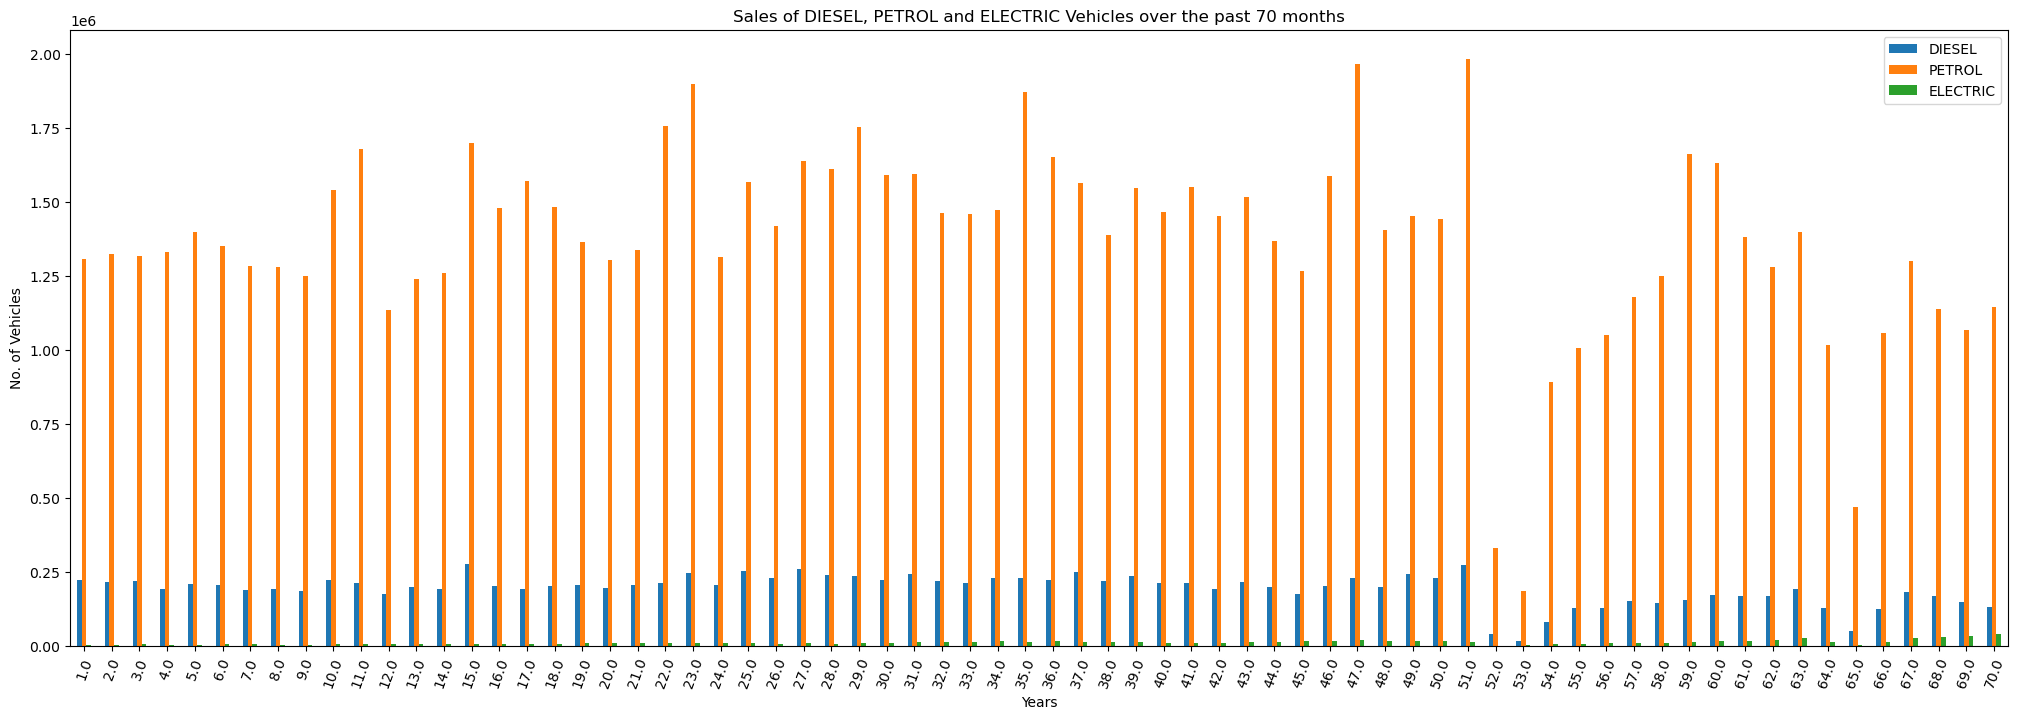

In [10]:
# Plotting Comparisio graph for DIESEL ,PETROL, ELECTRIC and Total Vehicles over the past 70 months
DPEV_month_dataset.plot.bar(x='timeinterval',y=['DIESEL','PETROL','ELECTRIC'],rot=70,title='Sales of DIESEL, PETROL and ELECTRIC Vehicles over the past 70 months',figsize=(25,8))
plt.xlabel('Years')
plt.ylabel('No. of Vehicles')
plt.savefig('output/Sales of DIESEL, PETROL and ELECTRIC Vehicles over the past 70 months.jpg')
plt.show()

In [11]:
ev_dataset = vehicle_dataset[['Vehicle Class', 'ELECTRIC', 'Year', 'Month']]
#ev_dataset

In [12]:
ev_dataset_grouped = ev_dataset.groupby('Vehicle Class').agg({'ELECTRIC' : 'sum'})
ev_dataset_grouped.drop(ev_dataset_grouped[ev_dataset_grouped['ELECTRIC'] == 0].index, inplace=True)

#ev_dataset_grouped.head()

In [13]:
ev_type_count = {'OTHERS' : 0}
max_count = ev_dataset_grouped['ELECTRIC'].max()
threshold = 0.025

# remove the EV with less count
for ev, row in ev_dataset_grouped.iterrows():
  if row['ELECTRIC']/max_count < threshold :
    ev_type_count['OTHERS'] += row['ELECTRIC']
  else:
    ev_type_count[ev] = row['ELECTRIC']

ev_type_count

{'OTHERS': 36018,
 'E-RICKSHAW WITH CART (G)': 25187,
 'E-RICKSHAW(P)': 532932,
 'M-CYCLE/SCOOTER': 146615,
 'MOTOR CAR': 13733,
 'THREE WHEELER (PASSENGER)': 16506}

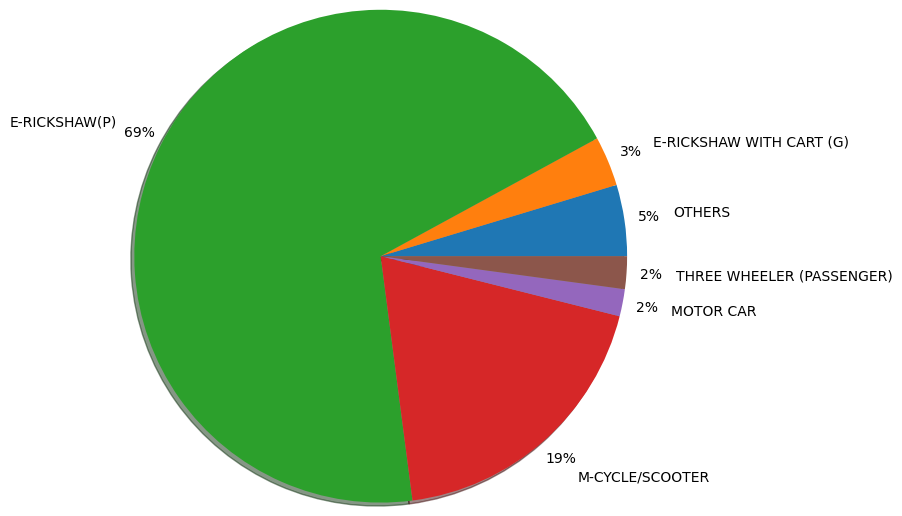

In [14]:
# Current market shares of differnt type of EVs
plt.figure(figsize=(10, 4))
plt.pie(ev_type_count.values(), labels=ev_type_count.keys(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=2, shadow=True)
plt.savefig('output/Current market shares of differnt type of EVs.jpg')
plt.show()

### **Implimenting Regression model to find number of EV in India by 2030**

In [15]:
# Removing months 48 to 66 data which was affected by COVID
df = DPEV_month_dataset[(DPEV_month_dataset['timeinterval']<48) | (DPEV_month_dataset['timeinterval']>66)]
df.head()

,timeinterval,DIESEL,PETROL,ELECTRIC,TOTAL,Log ELECTRIC,Log TOTAL
0,1.0,221831,1305912,2137,1574943,7.667158,14.269730
1,2.0,215196,1324057,2711,1584517,7.905073,14.275790
2,3.0,220363,1315082,4689,1586732,8.452975,14.277187
3,4.0,192510,1330967,3219,1572046,8.076826,14.267889
4,5.0,208805,1398426,4146,1658115,8.329899,14.321192


In [16]:
# Removing months 48 which was affected by COVID
df1 = DPEV_month_dataset[(DPEV_month_dataset['timeinterval']<48)]
df1.head()

,timeinterval,DIESEL,PETROL,ELECTRIC,TOTAL,Log ELECTRIC,Log TOTAL
0,1.0,221831,1305912,2137,1574943,7.667158,14.269730
1,2.0,215196,1324057,2711,1584517,7.905073,14.275790
2,3.0,220363,1315082,4689,1586732,8.452975,14.277187
3,4.0,192510,1330967,3219,1572046,8.076826,14.267889
4,5.0,208805,1398426,4146,1658115,8.329899,14.321192


Root Mean Squared Error: 0.19813348312630027

R2 Score: 0.8967912469580364




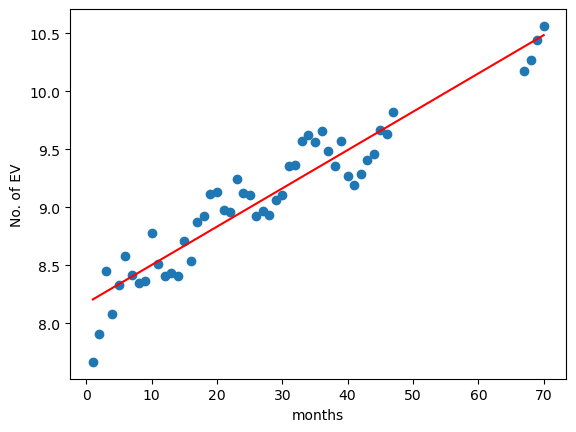

In [17]:
x = df[['timeinterval']].values
y = df[['Log ELECTRIC']].values

regressorE = linear_model.LinearRegression()
regressorE.fit(x,y)
y_pred = regressorE.predict(x)
y_intercept = regressorE.intercept_
coe = regressorE.coef_[[0]]
print('Root Mean Squared Error: '+ str(np.sqrt(mean_squared_error(y,y_pred))) + '\n')
print('R2 Score: ' + str(r2_score(y,y_pred)) + '\n\n')

plt.scatter(x, y)
y = coe * x + y_intercept
plt.xlabel('months')
plt.ylabel('No. of EV')
plt.plot(x,y,color='r')
plt.show()

In [18]:
# Predicting No. of EV from 2022 to 2030
x_future = []
m = []
for i in range(71,181,1):
  m.append(i)
  x_future.append([i])
y_pred_future = np.exp(regressorE.predict(x_future))
ev_from_2022_by_2030 = round(y_pred_future.sum())
print('Estimated Number of EV from 2022 to 2030 : ' + str(ev_from_2022_by_2030))
print(len(m))

Estimated Number of EV from 2022 to 2030 : 40513216
110


In [19]:
ev_by_2021 = DPEV_month_dataset['ELECTRIC'].sum()
ev_by_2030 = ev_by_2021 + ev_from_2022_by_2030
print('Number of EV by 2021: ' + str(ev_by_2021))
print('Number of EV by 2030: ' + str(ev_by_2030))

Number of EV by 2021: 770991
Number of EV by 2030: 41284207


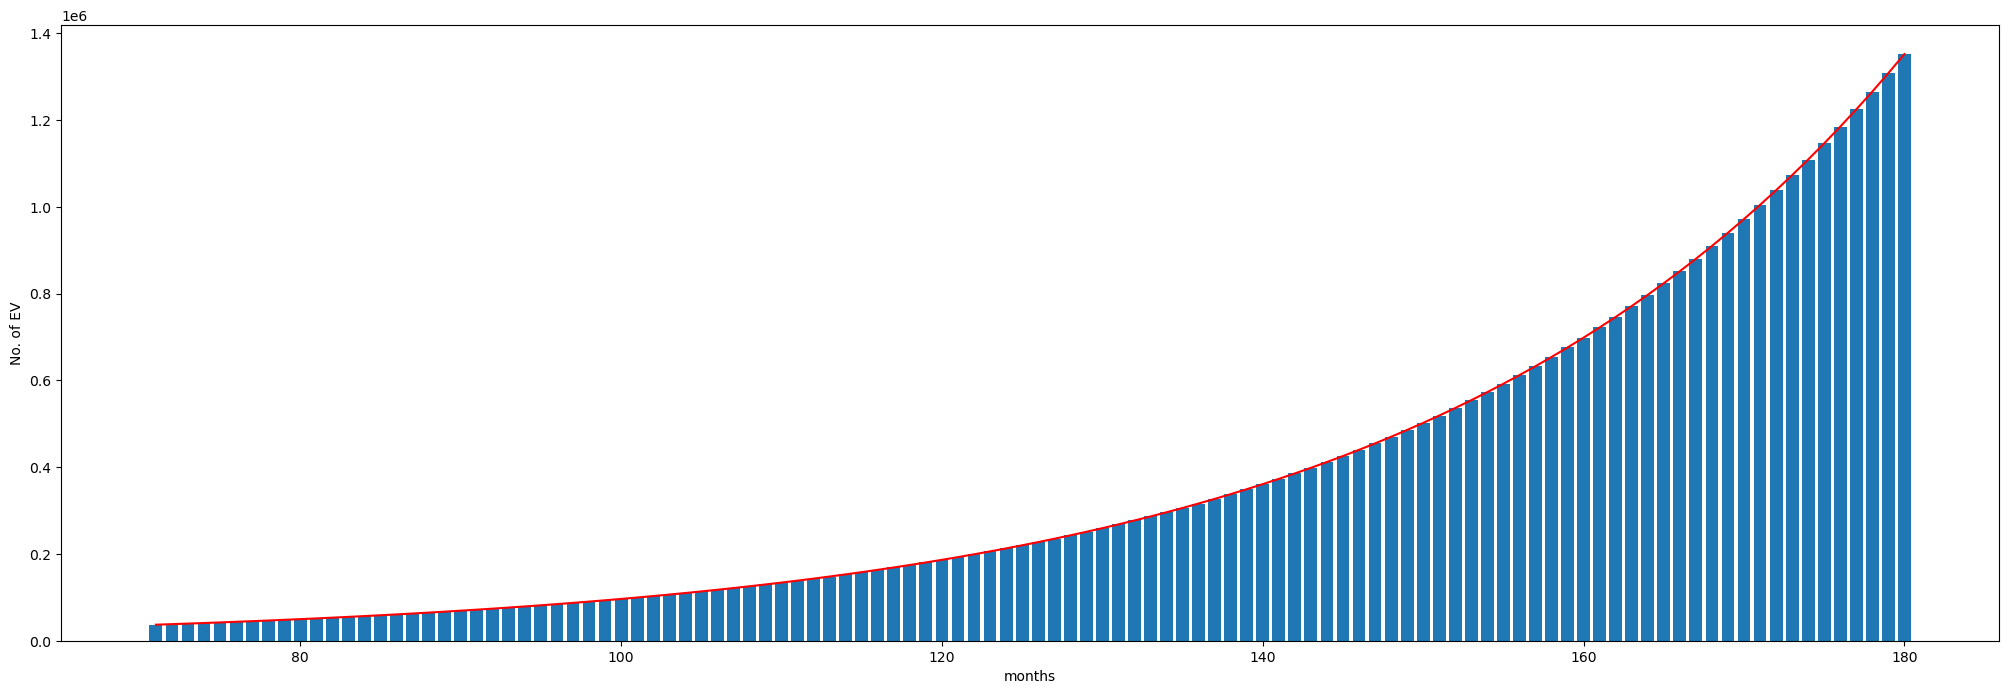

In [20]:
# Plotting Graph for estimated Number of ELECTRIC Vehicle month wise from 2022 to 2030
plt.figure(figsize=(25,8))
plt.bar(x=m, height=np.reshape(y_pred_future,110))
plt.plot(m,np.reshape(y_pred_future,110),'r')
plt.xlabel('months')
plt.ylabel('No. of EV')
plt.savefig('output/estimated Number of ELECTRIC Vehicle month wise from 2022 to 2030.jpg')
plt.show()

### **Reduction in Petrol and Diesel comsumption per year after introduction of EV**

In [21]:
# Dataframe contains Petrol and Diesel vehicles year wise data
DP_vehicles = DPEV_year_dataset[['Year','DIESEL','PETROL']]
DP_vehicles = DP_vehicles[DP_vehicles['Year']<2020]
DP_vehicles['Diesel vehicle percent'] = (DP_vehicles['DIESEL']*100)/(DP_vehicles['DIESEL']+DP_vehicles['PETROL'])
DP_vehicles['Petrol vehicle percent'] = (DP_vehicles['PETROL']*100)/(DP_vehicles['DIESEL']+DP_vehicles['PETROL'])
diesel_vehicle_percent = np.mean(DP_vehicles['Diesel vehicle percent'])/100
petrol_vehicle_percent = np.mean(DP_vehicles['Petrol vehicle percent'])/100
DP_vehicles

,Year,DIESEL,PETROL,Diesel vehicle percent,Petrol vehicle percent
0,2016.0,2437461,16186736,13.087603,86.912397
1,2017.0,2530697,17697397,12.510803,87.489197
2,2018.0,2785655,19084216,12.737409,87.262591
3,2019.0,2535852,18077203,12.302165,87.697835


In [22]:
diesel_vehicle_percent

0.12659495106890883

In [23]:
1-diesel_vehicle_percent

0.8734050489310912

In [24]:
# Dataframe contains Petrol and Diesel consumed year wise in India
oil_consumed = pd.read_csv('../Data sets/Oil Data/consumption-of-diesel-and-petrol-in-india.csv')
oil_consumed = oil_consumed[oil_consumed['Year']>2015]
oil_consumed = oil_consumed.sort_values(by='Year').reset_index(drop=True)
oil_consumed['Diesel Consumption (Mb)'] = oil_consumed['Diesel Consumption (Mb/d)']*365
oil_consumed['Petrol Consumption (Mb)'] = oil_consumed['Petrol Consumption (Mb/d)']*365
oil_consumed['Diesel Consumption per vehicle(in barrel)'] = (oil_consumed['Diesel Consumption (Mb)']/DP_vehicles['DIESEL'])*1000000
oil_consumed['Petrol Consumption per vehicle(in barrel)'] = (oil_consumed['Petrol Consumption (Mb)']/DP_vehicles['PETROL'])*1000000
oil_consumed.head()

,Year,Diesel Consumption (Mb/d),Petrol Consumption (Mb/d),Diesel Consumption (Mb),Petrol Consumption (Mb),Diesel Consumption per vehicle(in barrel),Petrol Consumption per vehicle(in barrel)
0,2016,1.495762,0.464882,545.952960,169.682100,223.984285,10.482787
1,2017,1.596176,0.512016,582.604179,186.885775,230.214909,10.560071
2,2018,1.645649,0.553287,600.661782,201.949902,215.626767,10.582038
3,2019,1.627652,0.586373,594.093008,214.026050,234.277477,11.839556


In [25]:
# Finding average Petrol and Diesel consumed by a vehicle in one year
avg_diesel_per_vehicle = np.mean(oil_consumed['Diesel Consumption per vehicle(in barrel)'])
avg_petrol_per_vehicle = np.mean(oil_consumed['Petrol Consumption per vehicle(in barrel)'])
print('Average Diesel consumed by a vehicle in one year (in barrel): ',avg_diesel_per_vehicle)
print('Average Petrol consumed by a vehicle in one year (in barrel): ',avg_petrol_per_vehicle)

Average Diesel consumed by a vehicle in one year (in barrel):  226.02585946590074
Average Petrol consumed by a vehicle in one year (in barrel):  10.86611295378982


In [26]:
# Predicting expected reduction in Petrol and Diesel consumption (in Mb) year wise
ev_future = y_pred_future[2:]
year_future = 2021
reduction_df = pd.DataFrame(columns=['Year','No of EV','Reduced DP (in Mb)'])
for i in range(0,97,12):
  sum = ev_future[i:i+12].sum()
  year_future += 1
  reduction_df = reduction_df.append({'Year':year_future, 'No of EV':round(sum),'Reduced DP (in Mb)':round((diesel_vehicle_percent * sum * avg_diesel_per_vehicle)+(petrol_vehicle_percent * sum * avg_petrol_per_vehicle))/1000000},ignore_index=True)

reduction_df['Year'] = reduction_df['Year'].astype(int)
reduction_df['No of EV'] = reduction_df['No of EV'].astype(int)
reduction_df

C:\Users\hp\AppData\Local\Temp\ipykernel_13072\2456753534.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduction_df = reduction_df.append({'Year':year_future, 'No of EV':round(sum),'Reduced DP (in Mb)':round((diesel_vehicle_percent * sum * avg_diesel_per_vehicle)+(petrol_vehicle_percent * sum * avg_petrol_per_vehicle))/1000000},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\2456753534.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduction_df = reduction_df.append({'Year':year_future, 'No of EV':round(sum),'Reduced DP (in Mb)':round((diesel_vehicle_percent * sum * avg_diesel_per_vehicle)+(petrol_vehicle_percent * sum * avg_petrol_per_vehicle))/1000000},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\2456753534.py:8: FutureWarning: The frame.append method is depr

,Year,No of EV,Reduced DP (in Mb)
0,2022,571780,21.787260
1,2023,849822,32.381843
2,2024,1263069,48.128299
3,2025,1877267,71.531851
4,2026,2790134,106.315947
5,2027,4146904,158.014653
6,2028,6163436,234.853109
7,2029,9160556,349.056125
8,2030,13615099,518.793127


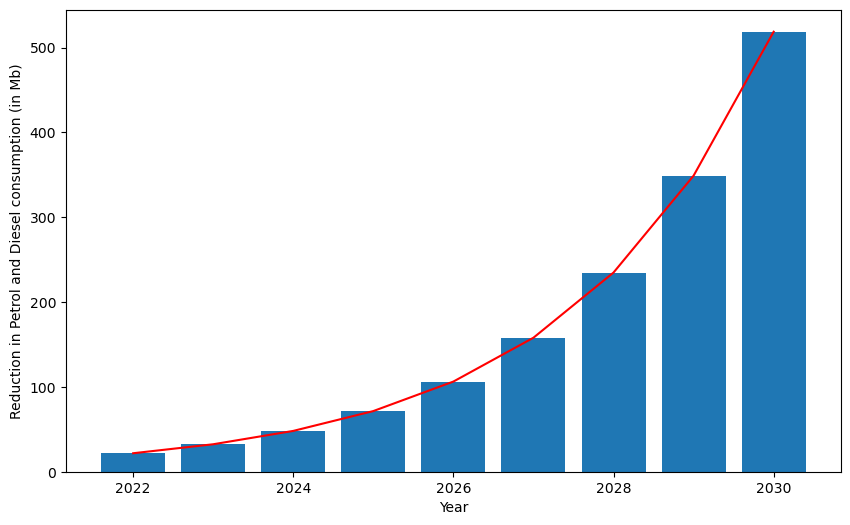

In [27]:
# Plotting graph shows expected reduction in Petrol and Diesel consumption (in Mb) year wise
plt.figure(figsize=(10,6))
plt.bar(x=reduction_df['Year'], height=reduction_df['Reduced DP (in Mb)'])
plt.plot(reduction_df['Year'], reduction_df['Reduced DP (in Mb)'],'r')
plt.xlabel('Year')
plt.ylabel('Reduction in Petrol and Diesel consumption (in Mb)')
plt.savefig('output/Reduction in Petrol and Diesel consumption (in Mb) yearwise.jpg')
plt.show()

### **Finding Expected EV market share in Auto mobile sector by 2030**

Root Mean Squared Error: 0.10314729952004174

R2 Score: 0.20857662720417125




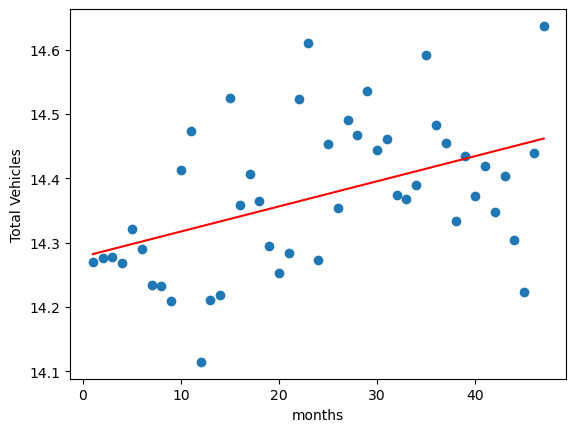

In [28]:
x = df1[['timeinterval']].values
y = df1[['Log TOTAL']].values

regressorT = linear_model.LinearRegression()
regressorT.fit(x,y)
y_pred = regressorT.predict(x)
y_intercept = regressorT.intercept_
coe = regressorT.coef_[[0]]
print('Root Mean Squared Error: '+ str(np.sqrt(mean_squared_error(y,y_pred))) + '\n')
print('R2 Score: ' + str(r2_score(y,y_pred)) + '\n\n')

plt.scatter(x, y)
y = coe * x + y_intercept

plt.xlabel('months')
plt.ylabel('Total Vehicles')
plt.plot(x,y,color='r')
plt.show()

In [29]:
x_future_total = []
for i in range(71,181,1):
  x_future_total.append([i])
y_pred_future_total = np.exp(regressorT.predict(x_future_total))
len(y_pred_future_total)

110

In [30]:
# Predicting expected total vehicles year wise
t_future = y_pred_future_total[2:]
year_future = 2021
future_ev_df = pd.DataFrame(columns=['Year','Total vehicles'])
for i in range(0,97,12):
  sum = t_future[i:i+12].sum()
  year_future += 1
  future_ev_df = future_ev_df.append({'Year':year_future, 'Total vehicles':round(sum)},ignore_index=True)

future_ev_df['Year'] = future_ev_df['Year'].astype(int)
future_ev_df['No of EV'] = reduction_df['No of EV']
future_ev_df['EV market share (selling percent yearwise)'] = (future_ev_df['No of EV']/future_ev_df['Total vehicles'])*100    #EV selling percentage yearwise
future_ev_df['Total vehicles oil consump (in Mb)'] = ((diesel_vehicle_percent * future_ev_df['Total vehicles'] * avg_diesel_per_vehicle)+(petrol_vehicle_percent * future_ev_df['Total vehicles'] * avg_petrol_per_vehicle))/1000000
future_ev_df['oil consump reduced bcoz of EV (in Mb)'] = reduction_df['Reduced DP (in Mb)']
future_ev_df

C:\Users\hp\AppData\Local\Temp\ipykernel_13072\970943646.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_ev_df = future_ev_df.append({'Year':year_future, 'Total vehicles':round(sum)},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\970943646.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_ev_df = future_ev_df.append({'Year':year_future, 'Total vehicles':round(sum)},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\970943646.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_ev_df = future_ev_df.append({'Year':year_future, 'Total vehicles':round(sum)},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13072\970943646.py:8: FutureWarning: The frame.append

,Year,Total vehicles,No of EV,EV market share (selling percent yearwise),Total vehicles oil consump (in Mb),oil consump reduced bcoz of EV (in Mb)
0,2022,25902352,571780,2.207444,986.98971,21.787260
1,2023,27144604,849822,3.130722,1034.324792,32.381843
2,2024,28446433,1263069,4.440167,1083.93001,48.128299
3,2025,29810697,1877267,6.297293,1135.914267,71.531851
4,2026,31240389,2790134,8.931176,1190.391609,106.315947
5,2027,32738648,4146904,12.666693,1247.481646,158.014653
6,2028,34308762,6163436,17.964612,1307.309663,234.853109
7,2029,35954177,9160556,25.478419,1370.006968,349.056125
8,2030,37678505,13615099,36.134924,1435.711194,518.793127


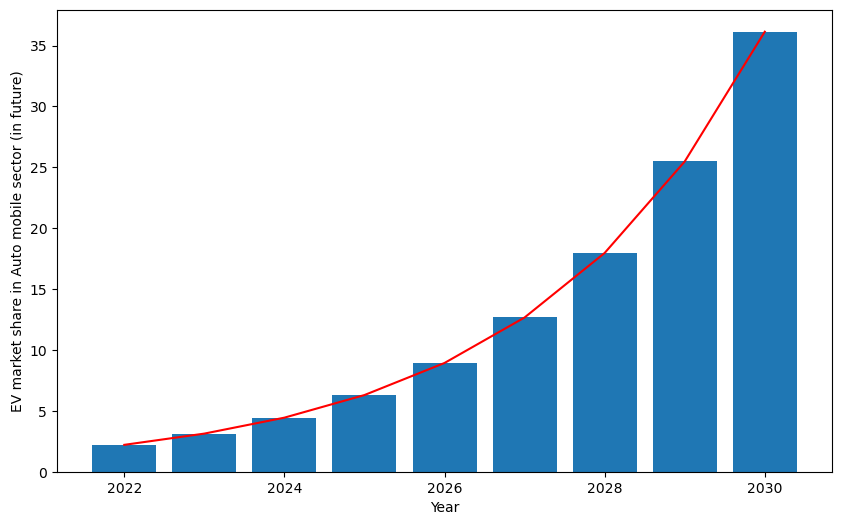

In [31]:
# Plotting graph shows expected EV market share in Auto mobile sector year wise
plt.figure(figsize=(10,6))
plt.bar(x=future_ev_df['Year'], height=future_ev_df['EV market share (selling percent yearwise)'])
plt.plot(future_ev_df['Year'], future_ev_df['EV market share (selling percent yearwise)'],'r')
plt.xlabel('Year')
plt.ylabel('EV market share in Auto mobile sector (in future)')
plt.savefig('output/EV market share in Auto mobile sector (in future).jpg')
plt.show()

### **EV electricity consumption**

In [32]:
elect_consumption = pd.read_excel('../Data sets/Electricity consumed by EVs/EV_Electricity_consumption.xlsx')
elect_requied_mean = np.mean(elect_consumption['Daily charging demand in kWh']*365)
elect_consumption

,EV Type,Daily kms driven,Battery capacity in kWh,Driving range in km/full charge,Daily charging demand in kWh
0,E-RICKSHAW(P),120,7.0,100,8.40
1,E-RICKSHAW WITH CART (G),120,7.0,100,8.40
2,LUXURY CAB,100,21.2,181,12.00
3,M-CYCLE/SCOOTER,40,2.5,80,1.25
4,M-CYCLE/SCOOTER-WITH SIDE CAR,40,2.5,80,1.25
5,MOPED,40,2.5,80,1.25
6,MOTOR CAB,100,21.2,181,12.00
7,MOTOR CAR,40,30.2,312,4.00
8,MOTOR CYCLE/SCOOTER-USED FOR HIRE,40,2.5,80,1.25
9,MOTORISED CYCLE (CC > 25CC),40,2.5,80,1.25


In [33]:
print('Yearly electricity required to charge EV: ',elect_requied_mean,' kWh')

Yearly electricity required to charge EV:  7202.232142857143  kWh


In [34]:
future_ev_df['electricity required (kWh)'] = future_ev_df['No of EV'] * elect_requied_mean
future_ev_df

,Year,Total vehicles,No of EV,EV market share (selling percent yearwise),Total vehicles oil consump (in Mb),oil consump reduced bcoz of EV (in Mb),electricity required (kWh)
0,2022,25902352,571780,2.207444,986.98971,21.787260,4.118092e+09
1,2023,27144604,849822,3.130722,1034.324792,32.381843,6.120615e+09
2,2024,28446433,1263069,4.440167,1083.93001,48.128299,9.096916e+09
3,2025,29810697,1877267,6.297293,1135.914267,71.531851,1.352051e+10
4,2026,31240389,2790134,8.931176,1190.391609,106.315947,2.009519e+10
5,2027,32738648,4146904,12.666693,1247.481646,158.014653,2.986697e+10
6,2028,34308762,6163436,17.964612,1307.309663,234.853109,4.439050e+10
7,2029,35954177,9160556,25.478419,1370.006968,349.056125,6.597645e+10
8,2030,37678505,13615099,36.134924,1435.711194,518.793127,9.805910e+10


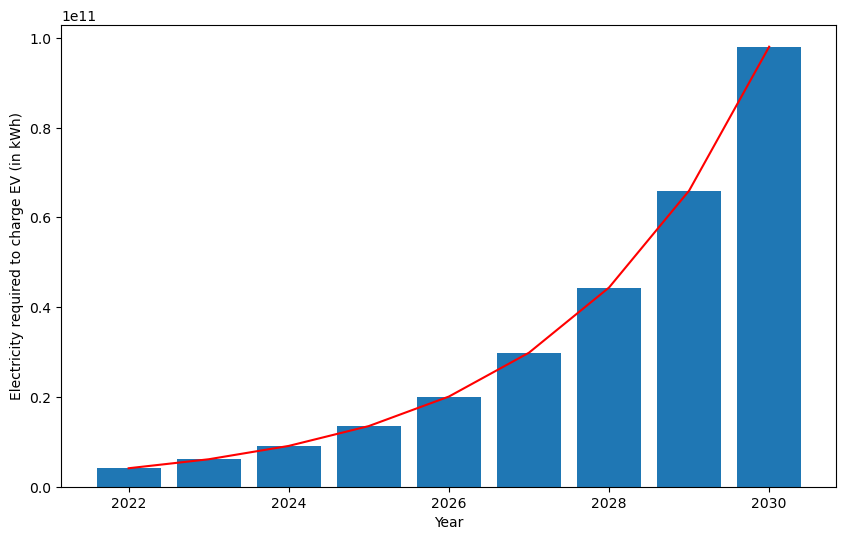

In [35]:
# Plotting graph shows expected Electricity required to charge EV year wise
plt.figure(figsize=(10,6))
plt.bar(x=future_ev_df['Year'], height=future_ev_df['electricity required (kWh)'])
plt.plot(future_ev_df['Year'], future_ev_df['electricity required (kWh)'],'r')
plt.xlabel('Year')
plt.ylabel('Electricity required to charge EV (in kWh)')
plt.savefig('output/Electricity required to charge EV (in kWh).jpg')
plt.show()

### **Oil import vs oil import price**

**Data gathering and preprocessing of Oil prices of past years**

In [36]:
oil_prices = pd.read_csv('../Data sets/Oil Data/oil_prices_modified.csv')
len(oil_prices)

259

In [37]:
oil_price_columns = ['month', 'year', 'price(Rs./bbl)']
oil_price_df = pd.DataFrame(columns=oil_price_columns)
month_map = {'01' : 'JAN', '02' : 'FEB', '03' : 'MAR', '04' : 'APR', '05' : 'MAY', '06' : 'JUN', '07' : 'JUL', 
             '08' : 'AUG', '09' : 'SEP', '10' : 'OCT', '11' : 'NOV', '12' : 'DEC'}

In [38]:
oil_price_columns = ['month', 'year', 'price(Rs./bbl)']
oil_price_df = pd.DataFrame(columns=oil_price_columns)

for idx, row in oil_prices.iterrows():
    day = row[str(oil_prices.columns[0])]
    price = row[str(oil_prices.columns[6])]
    if isinstance(day, float) or isinstance(price, float):
        continue
    
    month = day[3:5]
    if month in month_map :
        year = '20' + day[6:]
        month = month_map[month]
        price = int(float(price.replace(',', '')))
        oil_price_df.loc[len(oil_price_df.index)] = [month, year, price]
        #print(month, year, price)

In [39]:
## Oil_price_df gives the monthwise price(Rs./bbl) of imported oil
oil_price_df = oil_price_df[0:120]
oil_price_df

,month,year,price(Rs./bbl)
0,APR,2011,4956
1,MAY,2011,5283
2,JUN,2011,4918
3,JUL,2011,4865
4,AUG,2011,5057
...,...,...,...
115,NOV,2020,3010
116,DEC,2020,3077
117,JAN,2021,3643
118,FEB,2021,3979


**Visualization of Oil import price against past year(month-wise)**

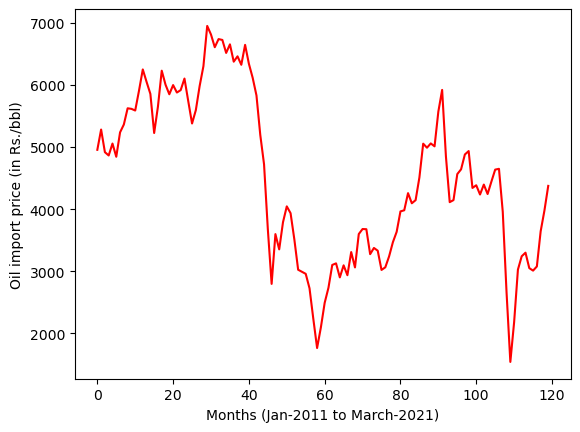

In [40]:
y_y = oil_price_df['price(Rs./bbl)'].tolist()
x_x = list(range(0,120))
plt.plot(x_x, y_y, color='red',)
plt.xlabel('Months (Jan-2011 to March-2021)')
plt.ylabel('Oil import price (in Rs./bbl)')
plt.show()

**Data gathering and preprocessing of Oil import (in bbl) of past years**

In [41]:
import pandas as pd 
import numpy as np
lis = []
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2011-12.csv')
lis.append( df.iloc[9][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2012-13.csv')
lis.append( df.iloc[9][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2013-14.csv')
lis.append( df.iloc[9][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2014-15.csv')
lis.append( df.iloc[8][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2015-16.csv')
lis.append( df.iloc[8][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2016-17.csv')
lis.append( df.iloc[8][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2017-18.csv')
lis.append( df.iloc[8][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2018-19.csv')
lis.append( df.iloc[8][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2019-20.csv')
lis.append( df.iloc[8][1:13].values.tolist())
df  = pd.read_csv('../Data sets/Oil Data/Oil import 2020-21.csv')
lis.append( df.iloc[8][1:13].values.tolist())

result = []
for sublist in lis:
    for item in sublist:
        result.append(item)

df_oil_import = pd.DataFrame(result,columns= {'oil'})
df_oil_import['oil quantity(In Barrels)'] = df_oil_import['oil'].astype(float)*7330




ValueError: columns cannot be a set

**Visualization of oil import(in bbl) past years**

In [ ]:
y_y = df_oil_import['oil quantity(In Barrels)'].tolist()
x_x = list(range(0,120))
plt.plot(x_x, y_y, color='red',)
plt.xlabel('Months (Jan-2011 to March-2021)')
plt.ylabel('Oil import (in Barrels)')
plt.show()

NameError: name 'df_oil_import' is not defined

**Model to Predict the Oil import price(Rs./bbl) based upon Oil Import(bbl)**

In [ ]:
# Separating input and output variable
x = df_oil_import['oil quantity(In Barrels)']
y = oil_price_df['price(Rs./bbl)']
x1 = x.values.reshape(-1,1)
y1 = y.values.reshape(-1,1)


# Spliting data into train test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.1)
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [ ]:
## Root mean squared error
y_pred_train = regressor.predict(x_train)
y_intercept = regressor.intercept_
coe = regressor.coef_[[0]]
np.sqrt(mean_squared_error(y_train, y_pred_train))

1288.6446395190496

In [ ]:
## Mean squared error
y_pred_test = regressor.predict(x_test)
mean_squared_error(y_test, y_pred_test)

856603.8741053077

In [ ]:
## Predicting the Oil price(Rs./Barrels) given the oil import (In Barrels)
y_pred = regressor.predict([[100000000]])        ## Dummy pediction: 100M is the input as oil import in Barrels in month
y_pred                                            ## y_pred gives the oil price (Rs./bbl)

array([[5168.70436085]])

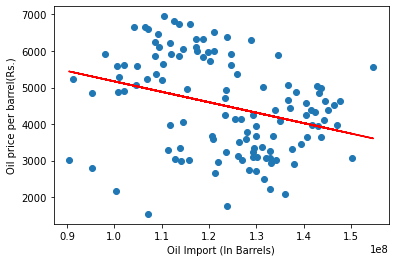

In [ ]:
## Plotting a graph Oil price Vs Oil Import

plt.scatter(x,y)
y = coe[0][0] * x + y_intercept[0]
plt.plot(x, y, color='red',)
plt.xlabel('Oil Import (In Barrels)')
plt.ylabel('Oil price per barrel(Rs.)')
plt.show()

**Oil import price(Rs./bbl) prediction**

In [ ]:
ff = []                                                    ##ff will have oil price(Rs./bbl) for future import of oil
future_ev_df['Resulting Consumption'] = future_ev_df['Total vehicles oil consump (in Mb)'] - future_ev_df['oil consump reduced bcoz of EV (in Mb)'] 
l2 = future_ev_df['Resulting Consumption'].tolist()        ##l2 have the oil consumption predicted from EV's analysis
for i in range(0,len(l2)):
  ff.append(regressor.predict([[(l2[i]*120000)]]))        ## 1440000/12 = 120000 (1440000 is multiplied in order to change consumption by vehicles(in Mb)
                                                          ## to overall consumption(in bbl) yearly because oil consumed by transport sector is 70% of oil 
                                                          ## import by India and divided by 12 to get effective monthly oil import
ip_list = []
for i in range(0,len(ff)):
  ip_list.append(ff[i][0][0])

## Oil import prize estimation (Rs./bbl) for 2022-2030
yrr = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
yrr_df =  pd.DataFrame(yrr,columns={'Year'})
future_import_price = pd.DataFrame(ip_list,columns={'import price(Rs./bbl)'})
future_import_oil = pd.DataFrame(l2,columns={'import oil(Mbbl)'})
result_dff = pd.concat([yrr_df,future_import_oil, future_import_price], axis=1)
result_dff                               

,Year,import oil(Mbbl),import price(Rs./bbl)
0,2022,965.202450,4716.325707
1,2023,1001.942949,4590.286967
2,2024,1035.801711,4474.134059
3,2025,1064.382416,4376.087592
4,2026,1084.075662,4308.529665
5,2027,1089.466993,4290.034639
6,2028,1072.456554,4348.389162
7,2029,1020.950843,4525.080147
8,2030,916.918067,4881.965885


### **Oil import price vs Oil selling price** ##

**Data collection and preprocessing**
Reference: https://www.mycarhelpline.com/index.php?option=com_easyblog&view=entry&id=808&Itemid=91

In [ ]:
f = []                                  ## f will contain yearly price of imported oil in Rs./bbl

for i in range(0,10):
  f.append((oil_price_df['price(Rs./bbl)'][i*12:(i*12)+12]).mean())
  
op = pd.DataFrame(f,columns={'import yrly(Rs./bbl)'})   ## op dataframe has yearly price of imported oil

##sell data is petrolium price from year 2011 to 2021
sell = 	[66.09,72.26,60.49,59.68,62.51,63.09,75.55,72.96,79.76,99.86] ##Manually collected data from website

pp = pd.DataFrame(sell,columns={'selling price(Rs.)'})


In [ ]:
op

,import yrly(Rs./bbl)
0,5271.916667
1,5918.833333
2,6334.416667
3,5341.000000
4,3035.250000
5,3142.583333
6,3558.750000
7,4828.166667
8,4479.166667
9,3089.750000


**Prediction Model for oil selling price(Rs.) given oil import price(Rs./bbl)**

In [ ]:
# Separating input and output variable
x = op['import yrly(Rs./bbl)']
y = pp['selling price(Rs.)']
x1 = x.values.reshape(-1,1)
y1 = y.values.reshape(-1,1)

# Spliting data into train test data
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.1)
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = regressor.predict(x_train)
y_intercept = regressor.intercept_
coe = regressor.coef_[[0]]
np.sqrt(mean_squared_error(y_train, y_pred_train))

11.172358056182484

In [ ]:
## Predicting the Oil selling price(Rs./litre) given the oil import price (Rs./In Barrels)
y_pred = regressor.predict([[4000]])
y_pred

array([[72.84017163]])

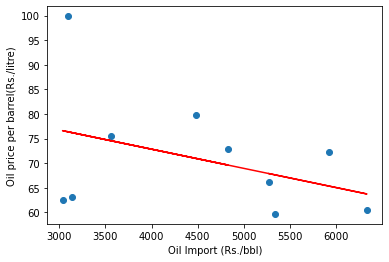

In [ ]:
plt.scatter(x,y)
y = coe[0][0] * x + y_intercept[0]
plt.plot(x, y, color='red',)
plt.xlabel('Oil Import (Rs./bbl)')
plt.ylabel('Oil price per barrel(Rs./litre)')
plt.show()

**oil selling price prediction**

In [ ]:
ll = []                               ##ll will have oil import price(Rs./litre) for future years predicted by oil import price vs oil import model
oil_price_list = []                   ##Oil_price_list will have oil import price(Rs.) for future years predicted by oil selling price vs oil import price model 
for i in range(0,len(ff)):
  ll.append(regressor.predict(ff[i]))
for i in range(0,len(ll)):
  oil_price_list.append(ll[i][0][0])

yrr = [2022,2023,2024,2025,2026,2027,2028,2029,2030]
yrr_df =  pd.DataFrame(yrr,columns={'Year'})

new_dff = pd.DataFrame(oil_price_list,columns={'Oil price(Rs./Litre)'})

result_df = pd.concat([yrr_df, new_dff], axis=1)
result_df

,Year,Oil price(Rs./Litre)
0,2022,70.046150
1,2023,70.537763
2,2024,70.990816
3,2025,71.373246
4,2026,71.636755
5,2027,71.708894
6,2028,71.481283
7,2029,70.792102
8,2030,69.400072


There is no co-relation b/w oil import price and oil selling price in India, number of
factors responsible for influencing petroleum prices other than cost of crude oil like- demand and
supply imbalances, taxes and duties on petroleum products and market conditions,
production and consumption of petroleum products, petroleum reserves, imports of
petroleum products, international prices of petroleum products, subsidy on petroleum
products, and locational effects, etc.


### **Monetary impact of EVs on Indian Economy**

In [ ]:
elect_price_df = pd.read_excel('../Data sets/Electricity price in india/electricity-price-in-india.xlsx')
elect_price_df.tail()

,Year,electricity price(Rs/kWh)
6,2015,5.21
7,2016,5.43
8,2017,5.48
9,2018,5.60
10,2019,6.09


Root Mean Squared Error: 0.22861404192502618

R2 Score: 0.9257998470000632




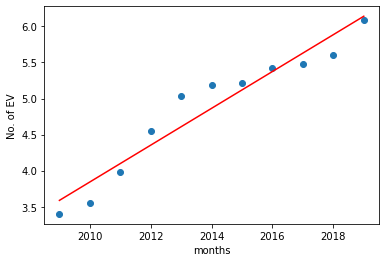

In [ ]:
x = elect_price_df[['Year']].values
y = elect_price_df[['electricity price(Rs/kWh)']].values

regressorEP = linear_model.LinearRegression()
regressorEP.fit(x,y)
y_pred = regressorEP.predict(x)
y_intercept = regressorEP.intercept_
coe = regressorEP.coef_[[0]]
print('Root Mean Squared Error: '+ str(np.sqrt(mean_squared_error(y,y_pred))) + '\n')
print('R2 Score: ' + str(r2_score(y,y_pred)) + '\n\n')

plt.scatter(x, y)
y = coe * x + y_intercept
plt.xlabel('months')
plt.ylabel('No. of EV')
plt.plot(x,y,color='r')
plt.show()

In [ ]:
# Predicting electricity price from 2020 to 2030
x_future = []
for i in range(2020,2031,1):
  x_future.append([i])
y_pred_future = (regressorEP.predict(x_future))
j=0
for i in range(2020,2031,1):
  elect_price_df.loc[len(elect_price_df.index)] =[i, round(y_pred_future[j][0],3)]
  j += 1
elect_price_df['Year'] = elect_price_df['Year'].astype(int)
elect_price_df.tail()

,Year,electricity price(Rs/kWh)
17,2026,7.929
18,2027,8.184
19,2028,8.440
20,2029,8.695
21,2030,8.950


In [ ]:
tempDf = elect_price_df.iloc[13:,1:].reset_index(drop=True)
future_ev_df['electricity price(Rs/kWh)'] = tempDf['electricity price(Rs/kWh)']
future_ev_df['electricity cost of EV(Cr)'] = future_ev_df['electricity required (kWh)'] * future_ev_df['electricity price(Rs/kWh)'] /10000000
future_ev_df

,Year,Total vehicles,No of EV,EV market share (selling percent yearwise),Total vehicles oil consump (in Mb),oil consump reduced bcoz of EV (in Mb),electricity required (kWh),Resulting Consumption,electricity price(Rs/kWh),electricity cost of EV(Cr)
0,2022,25902352,571780,2.207444,986.98971,21.787260,4.118092e+09,965.20245,6.907,2844.366348
1,2023,27144604,849822,3.130722,1034.324792,32.381843,6.120615e+09,1001.942949,7.163,4384.196757
2,2024,28446433,1263069,4.440167,1083.93001,48.128299,9.096916e+09,1035.801711,7.418,6748.092400
3,2025,29810697,1877267,6.297293,1135.914267,71.531851,1.352051e+10,1064.382416,7.674,10375.641468
4,2026,31240389,2790134,8.931176,1190.391609,106.315947,2.009519e+10,1084.075662,7.929,15933.478353
5,2027,32738648,4146904,12.666693,1247.481646,158.014653,2.986697e+10,1089.466993,8.184,24443.124387
6,2028,34308762,6163436,17.964612,1307.309663,234.853109,4.439050e+10,1072.456554,8.440,37465.579358
7,2029,35954177,9160556,25.478419,1370.006968,349.056125,6.597645e+10,1020.950843,8.695,57366.524031
8,2030,37678505,13615099,36.134924,1435.711194,518.793127,9.805910e+10,916.918067,8.950,87762.897763


In [ ]:
ff_df = pd.DataFrame(columns=['Oil cost saved bcoz of EV(Cr)'])
k = 0
oilConsumList = future_ev_df['oil consump reduced bcoz of EV (in Mb)'].tolist()
for p in ff:
  ff_df.loc[len(ff_df.index)] = future_ev_df.iloc[k]['oil consump reduced bcoz of EV (in Mb)'] * p[0] / 10       #1M/1Cr=10
  k += 1
future_ev_df = pd.concat([future_ev_df,ff_df], axis=1)
future_ev_df['Effective money saved bcoz of EV introduction(Cr)'] = future_ev_df['Oil cost saved bcoz of EV(Cr)'] - future_ev_df['electricity cost of EV(Cr)']
future_ev_df

,Year,Total vehicles,No of EV,EV market share (selling percent yearwise),Total vehicles oil consump (in Mb),oil consump reduced bcoz of EV (in Mb),electricity required (kWh),Resulting Consumption,electricity price(Rs/kWh),electricity cost of EV(Cr),Oil cost saved bcoz of EV(Cr),Effective money saved bcoz of EV introduction(Cr)
0,2022,25902352,571780,2.207444,986.98971,21.787260,4.118092e+09,965.20245,6.907,2844.366348,10275.581441,7431.215093
1,2023,27144604,849822,3.130722,1034.324792,32.381843,6.120615e+09,1001.942949,7.163,4384.196757,14864.195189,10479.998433
2,2024,28446433,1263069,4.440167,1083.93001,48.128299,9.096916e+09,1035.801711,7.418,6748.092400,21533.246177,14785.153777
3,2025,29810697,1877267,6.297293,1135.914267,71.531851,1.352051e+10,1064.382416,7.674,10375.641468,31302.964563,20927.323095
4,2026,31240389,2790134,8.931176,1190.391609,106.315947,2.009519e+10,1084.075662,7.929,15933.478353,45806.541154,29873.062800
5,2027,32738648,4146904,12.666693,1247.481646,158.014653,2.986697e+10,1089.466993,8.184,24443.124387,67788.833487,43345.709100
6,2028,34308762,6163436,17.964612,1307.309663,234.853109,4.439050e+10,1072.456554,8.440,37465.579358,102123.271388,64657.692030
7,2029,35954177,9160556,25.478419,1370.006968,349.056125,6.597645e+10,1020.950843,8.695,57366.524031,157950.694129,100584.170098
8,2030,37678505,13615099,36.134924,1435.711194,518.793127,9.805910e+10,916.918067,8.950,87762.897763,253273.034763,165510.137000


In [ ]:
print('Total money saved by 2030: ',round(future_ev_df['Effective money saved bcoz of EV introduction(Cr)'].sum(),3),' Cr')

Total money saved by 2030:  457594.461  Cr


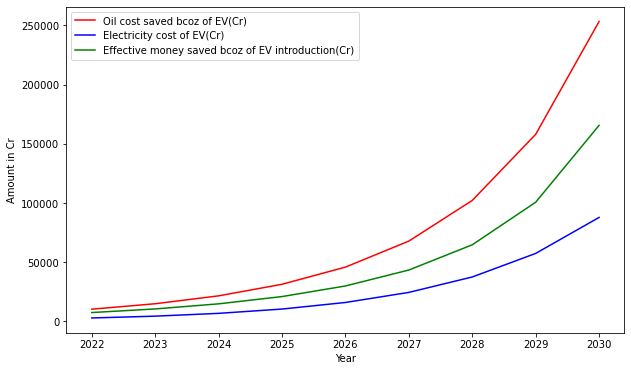

In [ ]:
# Plotting graph shows Effective money saved bcoz of EV introduction year wise
plt.figure(figsize=(10,6))
plt.plot(future_ev_df['Year'], future_ev_df['Oil cost saved bcoz of EV(Cr)'],'r',label='Oil cost saved bcoz of EV(Cr)')
plt.plot(future_ev_df['Year'], future_ev_df['electricity cost of EV(Cr)'],'blue',label='Electricity cost of EV(Cr)')
plt.plot(future_ev_df['Year'], future_ev_df['Effective money saved bcoz of EV introduction(Cr)'],'g',label='Effective money saved bcoz of EV introduction(Cr)')
plt.xlabel('Year')
plt.ylabel('Amount in Cr')
plt.legend()
plt.savefig('output/Effective money saved bcoz of EV introduction year wise.jpg')
plt.show()

### **Reduction in CO2 emission**

Reference: https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle#:~:text=typical%20passenger%20vehicle%3F-,A%20typical%20passenger%20vehicle%20emits%20about%204.6%20metric%20tons%20of,8%2C887%20grams%20of%20CO2.

In [ ]:
future_ev_df['Reduction in CO2 emission(Metric tons)'] = 4.6 * future_ev_df['No of EV']
future_ev_df

,Year,Total vehicles,No of EV,EV market share (selling percent yearwise),Total vehicles oil consump (in Mb),oil consump reduced bcoz of EV (in Mb),electricity required (kWh),Resulting Consumption,electricity price(Rs/kWh),electricity cost of EV(Cr),Oil cost saved bcoz of EV(Cr),Effective money saved bcoz of EV introduction(Cr),Reduction in CO2 emission(Metric tons)
0,2022,25902352,571780,2.207444,986.98971,21.787260,4.118092e+09,965.20245,6.907,2844.366348,10275.581441,7431.215093,2630188.0
1,2023,27144604,849822,3.130722,1034.324792,32.381843,6.120615e+09,1001.942949,7.163,4384.196757,14864.195189,10479.998433,3909181.2
2,2024,28446433,1263069,4.440167,1083.93001,48.128299,9.096916e+09,1035.801711,7.418,6748.092400,21533.246177,14785.153777,5810117.4
3,2025,29810697,1877267,6.297293,1135.914267,71.531851,1.352051e+10,1064.382416,7.674,10375.641468,31302.964563,20927.323095,8635428.2
4,2026,31240389,2790134,8.931176,1190.391609,106.315947,2.009519e+10,1084.075662,7.929,15933.478353,45806.541154,29873.062800,12834616.4
5,2027,32738648,4146904,12.666693,1247.481646,158.014653,2.986697e+10,1089.466993,8.184,24443.124387,67788.833487,43345.709100,19075758.4
6,2028,34308762,6163436,17.964612,1307.309663,234.853109,4.439050e+10,1072.456554,8.440,37465.579358,102123.271388,64657.692030,28351805.6
7,2029,35954177,9160556,25.478419,1370.006968,349.056125,6.597645e+10,1020.950843,8.695,57366.524031,157950.694129,100584.170098,42138557.6
8,2030,37678505,13615099,36.134924,1435.711194,518.793127,9.805910e+10,916.918067,8.950,87762.897763,253273.034763,165510.137000,62629455.4


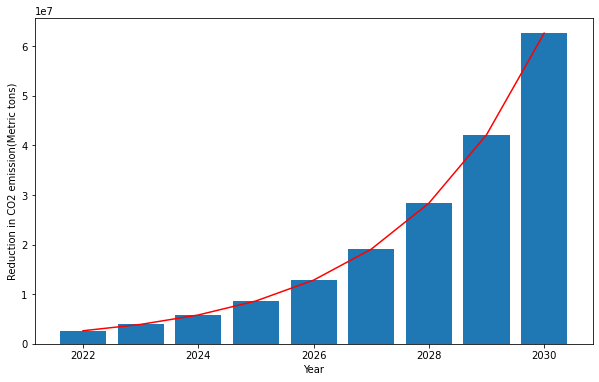

In [ ]:
# Plotting graph shows expected Reduction in CO2 emission(Metric tons) because of EV year wise
plt.figure(figsize=(10,6))
plt.bar(x=future_ev_df['Year'], height=future_ev_df['Reduction in CO2 emission(Metric tons)'])
plt.plot(future_ev_df['Year'], future_ev_df['Reduction in CO2 emission(Metric tons)'],'r')
plt.xlabel('Year')
plt.ylabel('Reduction in CO2 emission(Metric tons)')
plt.savefig('output/Reduction in CO2 emission(Metric tons) year wise.jpg')
plt.show()

In [ ]:
print('Total reduction in CO2 emission in 2030: ',future_ev_df['Reduction in CO2 emission(Metric tons)'].sum(),' Metric tons')

Total reduction in CO2 emission in 2030:  186015108.2  Metric tons


# **Disadvanages of EV**


Most Electric vehicles use Lithium ion batteries as their source of power. The extraction of lithium is not eco-friendly. A large amount of underground water is used to extract lithium using salt brine water. Nearly 2 million liters of water is required to produce 1000Kg lithium. This water could have otherwised be used by local farmers.
Here, we will show a plot of water consumed during production of lithium over time.

In [ ]:
#an EV battery has nearly 10kg lithium in it. So, in a year there are currently 10*(number of EVs) Kg lithium in use.
#1Kg lithium requires 2000 liters of water for its production. So, in a year 2000*10*(number of EVs) liters of water is consumed for this.

future_ev_df['water consumed for lithium extraction (in liters)']=2000*10*future_ev_df['No of EV']#np.round(y_pred_future) # no. of EVs yearwise 
future_ev_df

,Year,Total vehicles,No of EV,EV market share (selling percent yearwise),Total vehicles oil consump (in Mb),oil consump reduced bcoz of EV (in Mb),electricity required (kWh),Resulting Consumption,electricity price(Rs/kWh),electricity cost of EV(Cr),Oil cost saved bcoz of EV(Cr),Effective money saved bcoz of EV introduction(Cr),Reduction in CO2 emission(Metric tons),water consumed for lithium extraction (in liters)
0,2022,25902352,571780,2.207444,986.98971,21.787260,4.118092e+09,965.20245,6.907,2844.366348,10275.581441,7431.215093,2630188.0,11435600000
1,2023,27144604,849822,3.130722,1034.324792,32.381843,6.120615e+09,1001.942949,7.163,4384.196757,14864.195189,10479.998433,3909181.2,16996440000
2,2024,28446433,1263069,4.440167,1083.93001,48.128299,9.096916e+09,1035.801711,7.418,6748.092400,21533.246177,14785.153777,5810117.4,25261380000
3,2025,29810697,1877267,6.297293,1135.914267,71.531851,1.352051e+10,1064.382416,7.674,10375.641468,31302.964563,20927.323095,8635428.2,37545340000
4,2026,31240389,2790134,8.931176,1190.391609,106.315947,2.009519e+10,1084.075662,7.929,15933.478353,45806.541154,29873.062800,12834616.4,55802680000
5,2027,32738648,4146904,12.666693,1247.481646,158.014653,2.986697e+10,1089.466993,8.184,24443.124387,67788.833487,43345.709100,19075758.4,82938080000
6,2028,34308762,6163436,17.964612,1307.309663,234.853109,4.439050e+10,1072.456554,8.440,37465.579358,102123.271388,64657.692030,28351805.6,123268720000
7,2029,35954177,9160556,25.478419,1370.006968,349.056125,6.597645e+10,1020.950843,8.695,57366.524031,157950.694129,100584.170098,42138557.6,183211120000
8,2030,37678505,13615099,36.134924,1435.711194,518.793127,9.805910e+10,916.918067,8.950,87762.897763,253273.034763,165510.137000,62629455.4,272301980000


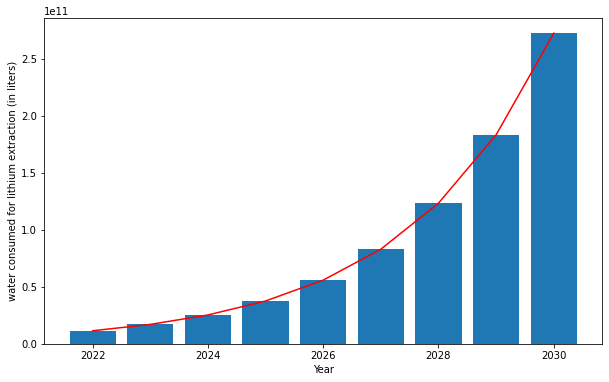

In [ ]:
#water_per_month= 2000*10*EVs_per_year
#print(len(water_per_month))
plt.figure(figsize=(10,6))
plt.bar(x=future_ev_df['Year'], height=future_ev_df['water consumed for lithium extraction (in liters)'])
plt.plot(future_ev_df['Year'], future_ev_df['water consumed for lithium extraction (in liters)'],'r')
plt.xlabel('Year')
plt.ylabel('water consumed for lithium extraction (in liters)')
plt.savefig('output/water consumed for lithium extraction year wise.jpg')
plt.show()

In [ ]:
future_ev_df.to_csv('output/Study impact of electric vehicles on Indian economy (production).csv')